# D207 Data Cleaning Performance Assessment
By Luis Medina, Student ID 012020203

## A1: Question For Analysis
 For this the question we will be looking at the medical data again. The question I am asking is that, if there is any relationship between being overweight and being readmitted to the hostipal. The research question is, "Do patients that are overweight have a higher rate of readmission than the rest of the population?" This the hypothesis statement:
$$ H_0: \text{readmission}_{\text{overweight}} = \text{readmission}_{\text{population}} $$
$$ H_1: \text{readmission}_{\text{overweight}} \neq \text{readmission}_{\text{population}} $$
With the $ \alpha $ value of 0.05.

## A2: Benefit from Analysis
An individual's health is often a factor into if a individual needs to visit a hostpital or be readmittted into one. Being overweight can lead to many different health problems that can lead to being readmitted into the hospital. Finding a relationship between these factors is greatly important for hospitals as it can help reduce the number of readmissions a hospital has. Looking at this will save the company money, as having less readmission of patients, then the hospital will not be penalized for having a increasing number of readmission of patients. Finding a relationship could demonstrate the necessity to treat not only the issue directly responsible for the patient's hospitalization, but also treatment to help reduce readmission to hospitals. 

## A3: Data Identification
The relevant data that will be used for the research is:
* ReAdmis (Object), example: No 
For this column it indicates if whether or not the patient was readmitted within 1 month of release.
* Overweight (Object), example: Yes
For this column it indicates whethter the patient is considered overweight based on age, gender, and height.

## B1: Code
Here will clean the data similar to how we did in the previous project, in order to prepare the data for analysis. 

In [2]:
# First import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
medical_data = pd.read_csv('medical_clean.csv')
# create a copy of the data to work with
medical_data_copy = medical_data.copy()
medical_data_copy.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
medical_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
# Change the columns to categorical data types 
medical_data_copy[['Age', 'Marital', 'Initial_admin', 'Complication_risk','Services', 'Gender']] = medical_data_copy[['Age', 'Marital', 'Initial_admin', 'Complication_risk','Services', 'Gender']].astype('category')

medical_data_copy['TimeZone'].replace({
    'America/New_York': 'Eastern Daylight Time',
    'America/Chicago': 'Central Daylight Time',
    'America/Los_Angeles': 'Pacific Daylight Time',
    'America/Denver': 'Mountain Daylight Time',
    'America/Detroit': 'Eastern Daylight Time',
    'America/Indiana/Indianapolis': 'Eastern Daylight Time',
    'America/Phoenix': 'Mountain Standard Time',
    'America/Boise': 'Mountain Daylight Time',
    'America/Anchorage': 'Alaska Daylight Time',
    'America/Puerto_Rico': 'Atlantic Standard Time',
    'America/Honolulu': 'Hawaii-Aleutian Standard Time',
    'America/Menominie': 'Central Daylight Time',
    'America/Nome': 'Alaska Daylight Time',
    'America/Indiana/Vincennes': 'Eastern Daylight Time',
    'America/Kentucky/Louisville': 'Eastern Daylight Time',
    'America/Sitka': 'Alaska Daylight Time',
    'America/Toronto': 'Eastern Daylight Time',
    'America/Indiana/Marengo': 'Eastern Daylight Time',
    'America/Indiana/Tell_City': 'Central Daylight Time',
    'America/north_Dakota/Beulah': 'Central Daylight Time',
    'America/Yakutat': 'Alaska Daylight Time',
    'America/Indiana/Winamac': 'Eastern Daylight Time',
    'America/Indiana/Knox': 'Central Daylight Time',
    'America/north_dakota/new_Salem': 'Central Daylight Time',
    'America/indiana/vevay': 'Eastern Daylight Time',
    'America/Adak': 'Hawaii-Aleutian Standard Time',
}, inplace=True)

# Convert the Timezone column to a categorical data type
medical_data_copy['TimeZone'] = medical_data_copy['TimeZone'].astype('category')

# Convert items 1-8 to categorical data types
medical_data_copy[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']] = medical_data_copy[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']].astype('category')

/var/folders/wc/mqxkmhbn1vzchsh52r6msgwm0000gn/T/ipykernel_43617/2898436551.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical_data_copy['TimeZone'].replace({


In [6]:
# Generate a crosstab of the ReAdmis vs Overweight columns
table = pd.crosstab(medical_data_copy.ReAdmis, medical_data_copy.Overweight)
print(table)

Overweight    No   Yes
ReAdmis               
No          1821  4510
Yes         1085  2584


For this testing we will be using a Chi-Square test to compare the two categorical variables. We want to determine if there is any significant association between the two.

In [7]:
# Create the chi-square test
chi = stats.chi2_contingency(table)
print(chi)
print(f'The p-value is: {chi[1]:.2f}')

Chi2ContingencyResult(statistic=0.6984802059617877, pvalue=0.4032948387365497, dof=1, expected_freq=array([[1839.7886, 4491.2114],
       [1066.2114, 2602.7886]]))
The p-value is: 0.40


## B2: Output
After running the chi-square test it returned a p-value of 0.40. This is the probability of finding a result as the one observed, under the null hypothesis. Since, the p-value we got was 0.40, which is much bigger than the alhpa we chose in the beginning of 0.05. As a result, we do not reject the null hypothesis and therefore we accept the null hypothesis. This concludes that the distribution of readmitted patients who are overweight is not statistically significant from the distribution of readmitted patients that are not overweight. 

## B3: Justification
The reason I used a chi-square test for independence is that the data I was working with was categorical and the question I wanted to answer. I wanted to see if there was any difference in being overweight and that causing individuals to be readmitted to the hospital more often or not. 

## C: Univariate Statistics 
For this part I will be using 4 variables, 2 categorical and 2 continuous variables. The 4 variables that will be used are:

* Marital (Categorical)
* Complication_risk (Categorical)
* TotalCharge (Continuous)
* Additional_charges (Continuous)

In [8]:
medical_data_copy['Complication_risk'].value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

## C1: Visual of Findings

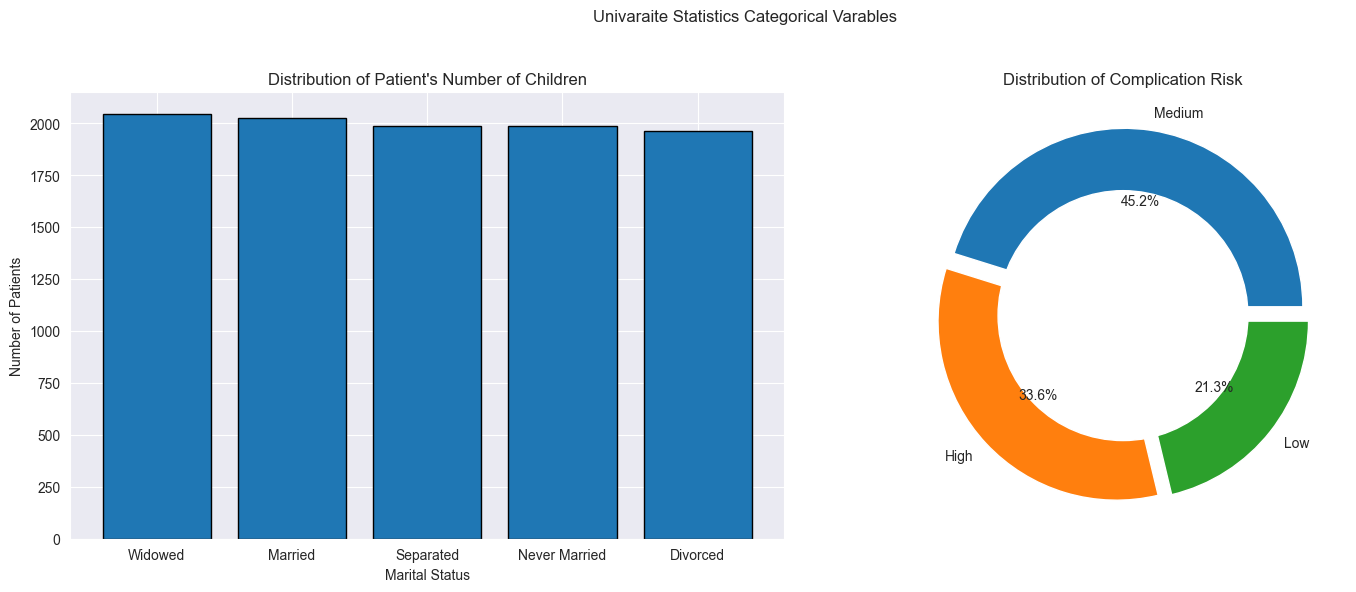

In [9]:
plt.figure(figsize=(15,6))
plt.suptitle("Univaraite Statistics Categorical Varables")

# Plot the first plot for the marital status column. 
plt.subplot(1,2,1)
plt.title("Distribution of Patient's Number of Children")
categories = medical_data_copy['Marital'].value_counts().index
frequencies = medical_data_copy['Marital'].value_counts()
plt.bar(categories, frequencies, edgecolor='black')
plt.xlabel('Marital Status')
plt.ylabel('Number of Patients')

# Plt the second categorical for complication risk
plt.subplot(1,2,2)
complication = medical_data_copy['Complication_risk'].value_counts()
complication_labels = ['Medium', 'High', 'Low']
explode = (0.05, 0.05, 0.05)
plt.pie(complication, labels=complication_labels, autopct='%1.1f%%', explode=explode)
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
plt.title('Distribution of Complication Risk')
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.tight_layout(rect=[0,0,1,0.95])

plt.show()

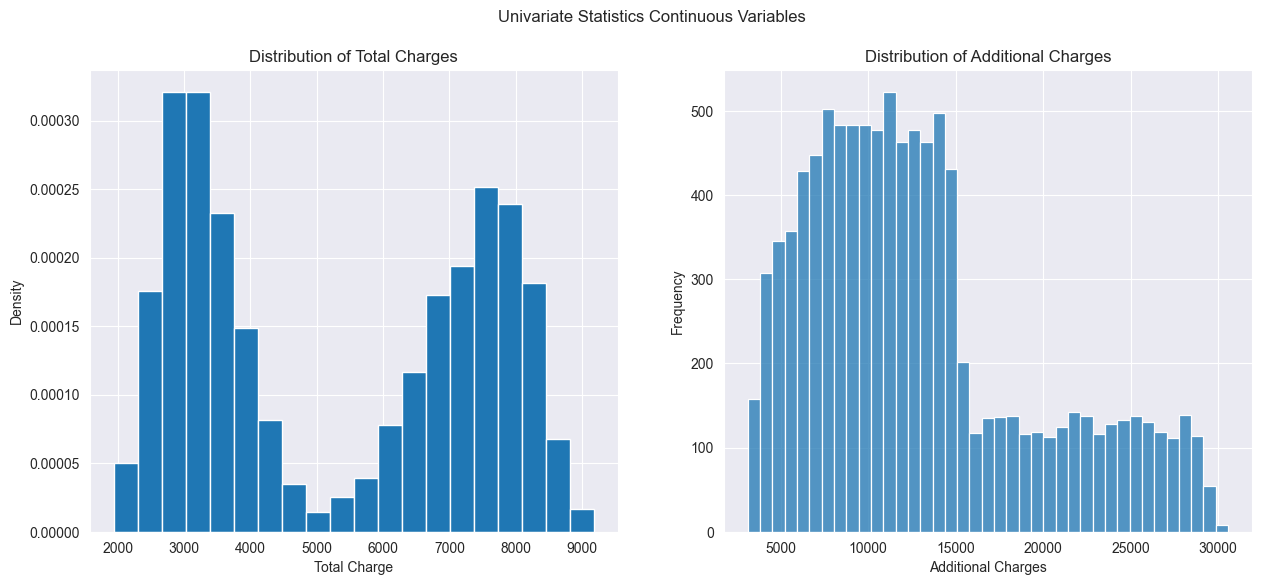

In [10]:
plt.figure(figsize=(15,6))
plt.suptitle('Univariate Statistics Continuous Variables')

# Plot the first plot for the total charge column
plt.subplot(1,2,1)
plt.title('Distribution of Total Charges')
plt.hist(data=medical_data_copy, x='TotalCharge', bins=20, density=True)
plt.xlabel('Total Charge')
plt.ylabel('Density')

# Plot the second plot for population
plt.subplot(1,2,2)
plt.title('Distribution of Additional Charges')
sns.histplot(data=medical_data_copy, x='Additional_charges')
plt.xlabel('Additional Charges')
plt.ylabel('Frequency')

plt.show()

Looking at the distribution for additional charges there is no surprise that around 15,000 extra charge is drops down and starts to plateau, as it will be more rare to get that much additional charges added on. On the other I know it can be common to have additonal charges added on that are not as expensive. Then looking at the graph next to it about total charge I was suprised to see that around 5000 it drops and create a divot on the graph but then goes back up after that. I was expecting more of a linear graph. 

Then looking at the other variables the graph that stood out the most was the marital status, as I did not expect all the columns to be similar. I was expecting at least a difference of each of the bar size and not all of them mostly the same. I would have expected that at least some of the bars would be higher than others, as I figured some are more common than users. 

## D: Bivariate Statistics
Once again I will be using 4 variables to create two graphs, here are the variables that will be used:
* TotalCharge (continuous) vs Gender (categorical)
* Additional_charge (continuous) vs Overweight (categorical)


## D1: Visual of Findings

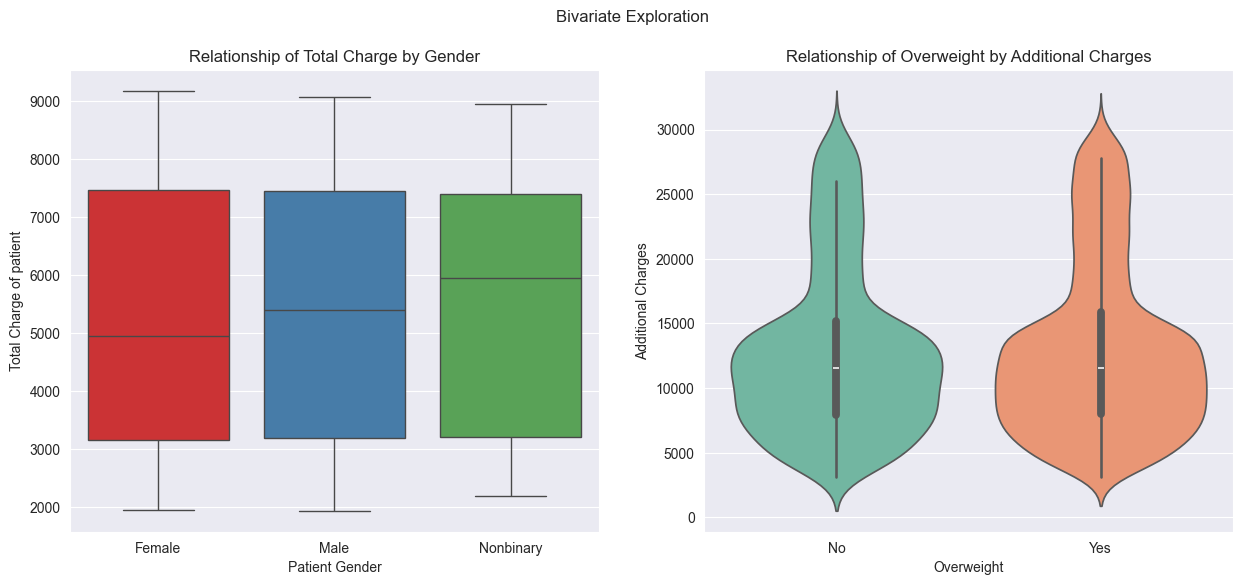

In [15]:
plt.figure(figsize=(15,6))
plt.suptitle('Bivariate Exploration')

# Plot the left side first which will be Doc_visits vs Gender
plt.subplot(1,2,1)
plt.title('Relationship of Total Charge by Gender')
sns.boxplot(data=medical_data_copy, x='Gender', y='TotalCharge', palette='Set1', hue='Gender', legend=False)
plt.xlabel('Patient Gender')
plt.ylabel('Total Charge of patient')

# Plot the right plot which will be Overweight vs additional charges
plt.subplot(1,2,2)
plt.title('Relationship of Overweight by Additional Charges')
sns.violinplot(data=medical_data_copy, x='Overweight', y='Additional_charges', palette='Set2', hue='Overweight', legend=False)
plt.xlabel('Overweight')
plt.ylabel('Additional Charges')

plt.show()

First, lets take a look at the graph to the left, here we are comparing if gender has an impact on the total charge per patient. Just by looking at the graph we can see that males have a higher average total charge compared to women. The column Nonbinary, we can't have a good comparison to the other two columns because there are not enough data points to make a good comparison. So, we can see that the average cost of a male patient is going to be higher on average than other patients. 
The plot on the right side we are comparing overweight vs Additional charges. Here we can see that the overweight patients have a higher average additional charges compared to the patients that are not overweight. This is interesting because it could be that the overweight patients have more health problems that require more treatment and thus more additional charges. 

In [12]:
medical_data_copy['Gender'].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

## E1: Results of Analysis
$$ H_0: \text{readmission}_{\text{overweight}} = \text{readmission}_{\text{population}} $$
$$ H_1: \text{readmission}_{\text{overweight}} \neq \text{readmission}_{\text{population}} $$
 
As mentioned at the start of the page, I will use an alpha of 0.05 (95% certainty) in testing the null hypothesis, meaning no difference in readmission for being overweight or not agianst the alternative hypothesis, that there would be a difference. From the chi-square test I did earlier in the project, the result of the p-value was 0.40. Meaning that from that result, since the p-value is greater than the alpha value, so we fail to reject the null hypothesis and thus we must accept it. This will indicate that by accepting the null hypothesis the conculsion of our analysis is that readmission of patients that are overweight is equal to readmission of patients that are not overweight.   

## E2: Limitations of Analysis
One of the limitations that were faced is that the total amount of data I was working on is only 10,000, which can be small, when looking at nationwide network of hospitals. Having a larger dataset might provide different results because it can reduce standard deviation rates. 

## E3: Recommended Course of Action
Since I ended up accepting the null hypothesis from the previous test, there is not much to recommend in the terms of healthcare outcomes or reducing the readmission rates. I do believe that this data should in fact still be collected because if we combine overweight with other factors I think we would get different results that can in fact help out. 

## F:Video
Here is the Panopto recording for the assessment: [Video](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=a0a03167-cd0b-4865-ad85-b1e60046a0ab)

## G: Sources for Third-Party Code
For creating the chi-square test I used [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html).

For creating the donut graph I used [Geeksforgeeks](https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/)


## H: Sources
Used the course material for the Chi-Square test.